In [2]:
import pandas as pd
import csv

In [8]:
assessment = ({"id_student":[0,1],"number":["12345","12344"]})
info = ({"id_student":[0,1],"status":["pass","pass"]})

df = pd.DataFrame(assessment)
dc = pd.DataFrame(info)

res = df.merge(dc, on=['id_student'], how='outer')
print(res)

   id_student number status
0           0  12345   pass
1           1  12344   pass


In [10]:
res.to_csv("new.csv", index=False)

In [23]:
#Check memory address
a = 257   # if a and b have same value between -5 and 256, then by definition there is only one object. 
b = 257   # So, they are same
print (hex(id(a)))
print (hex(id(b)))
print (a is b)
print (a,b)

0x11b191d10
0x11b1913f0
False
257 257


In [27]:
data = ({"year":[2018,2018,2018,2019,2020,2019],"month":['Jan','Feb','Dec','Apr','Nov','Sep'],
        "BL_year":[2019,2018,2020,2019,2020,2018],"BL_month":['Jan','Mar','Dec','Sep','Dec','Jan']})

df = pd.DataFrame(data)
df

,BL_month,BL_year,month,year
0,Jan,2019,Jan,2018
1,Mar,2018,Feb,2018
2,Dec,2020,Dec,2018
3,Sep,2019,Apr,2019
4,Dec,2020,Nov,2020
5,Jan,2018,Sep,2019


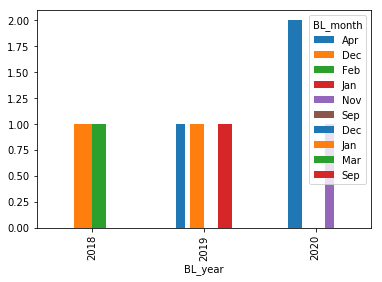

In [59]:
import matplotlib.pyplot as plt

# Create an axis object
fig, ax = plt.subplots()

# Define dataframes
df_Activity_count = df.sort_values(['year','month'],ascending = True).groupby('month')
df_Activity_count_BL = df.sort_values(['BL_year','BL_month'],ascending = True).groupby('BL_month')

# Plot using the axis object ax defined above
df_Activity_count['year'].value_counts().unstack(0).plot.bar(ax=ax)
df_Activity_count_BL['BL_year'].value_counts().unstack(0).plot.bar(ax=ax)

In [60]:
data = [
  {
    "id": 123456,
    "first_name": "John",
    "last_name": "Doe",
    "fields": [
      {
        "title": "ABC",
        "value": "123"
      },
      {
        "title": "DEF",
        "value": "456"
      }
    ]
  }
]

df = pd.DataFrame(data)
df

,fields,first_name,id,last_name
0,"[{'title': 'ABC', 'value': '123'}, {'title': '...",John,123456,Doe


In [62]:
from pandas.io.json import json_normalize
json_normalize(data, 'fields', ['id', 'first_name', 'last_name'])

,title,value,id,first_name,last_name
0,ABC,123,123456,John,Doe
1,DEF,456,123456,John,Doe


In [191]:
mailtext = ({"id":["1","2"],"text":['''"Gallagher, Keith G" <Keith.Gallagher@charter.com> 
Date: Friday, March 29, 2019 at 3:14 AM 
To: Lesley Kirchman <ljkirchman@actiontec.com>
Subject: Automatic reply: News Recap, March 29, 2019 Issue of CrossTalk  

Thank you for your email. I will be out of the office Thursday, March 28th 
through Monday, April 1st. I will respond to emails on Tuesday, April 2nd. 
If this is urgent please contact lisa.chiapetta@charter.com or  for National 
Account question or Stephen.thompson@charter.com or 309-557-1368 for 
National TeleSales 
inquiries.  
Thank you, Keith''','''"Wwwd" <ewr_r@example.ac.uk> 
Date: Friday, March 29, 2019 at 3:14 AM 
To: Lesley Kirchman <sadaasd@actiontec.com>
Subject: Automatic reply: News Recap, March 29, 2019 Issue of CrossTalk  

Thank you for your email. I will be out of the office Thursday, March 28th 
through Monday, April 1st. I will respond to emails on Tuesday, April 2nd. 
If this is urgent please contact prutt@charter.com or  for National 
Account question or Jerry.jack@charter.com or for 
National TeleSales 
inquiries.  
Thank you, Keith
''']})

dmail = pd.DataFrame(mailtext)
dmail

,id,text
0,1,"""Gallagher, Keith G"" <Keith.Gallagher@charter...."
1,2,"""Wwwd"" <ewr_r@example.ac.uk> \nDate: Friday, M..."


In [192]:
import re

info = []
for text in dmail["text"]:
    mail1 = re.findall("(\S+@\S+)",text)[:1]
    try:
        mail2 = re.findall("(\S+@\S+)",text)[1:]
        phone = re.findall("(\d{3}[\W]\d{3}[\W]\d{4})",text)
        mail1.insert(len(mail1),(", ".join(m for m in mail2)))
        mail1.insert(len(mail1),phone[0])
    except:
        pass
    info.append(mail1)
info

[['<Keith.Gallagher@charter.com>',
  '<ljkirchman@actiontec.com>, lisa.chiapetta@charter.com, Stephen.thompson@charter.com',
  '309-557-1368'],
 ['<ewr_r@example.ac.uk>',
  '<sadaasd@actiontec.com>, prutt@charter.com, Jerry.jack@charter.com']]

In [193]:
dmail[['Sender', 'Other_mails', 'Phone']] = pd.DataFrame(info) 
(dmail)

,id,text,Sender,Other_mails,Phone
0,1,"""Gallagher, Keith G"" <Keith.Gallagher@charter....",<Keith.Gallagher@charter.com>,"<ljkirchman@actiontec.com>, lisa.chiapetta@cha...",309-557-1368
1,2,"""Wwwd"" <ewr_r@example.ac.uk> \nDate: Friday, M...",<ewr_r@example.ac.uk>,"<sadaasd@actiontec.com>, prutt@charter.com, Je...",None


In [15]:
df = pd.DataFrame({'Column1': ["'Cat'", "'toy'", "'cat'"],
                   'Column2': ["'Bat'", "'flower'", "'bat'"],
                   'Column3': ["'xyz'", "'abc'", "'lmn'"]})
result_df = df.apply(lambda x: x.astype(str).str.lower()).drop_duplicates(subset=['Column1', 'Column2'], keep='first')
result_df

,Column1,Column2,Column3
0,'cat','bat','xyz'
1,'toy','flower','abc'
